**Machine Learning: Code Assignment U3A2**

**Image Segmentation**

Author: Gowtham Iyer

# Loading the image

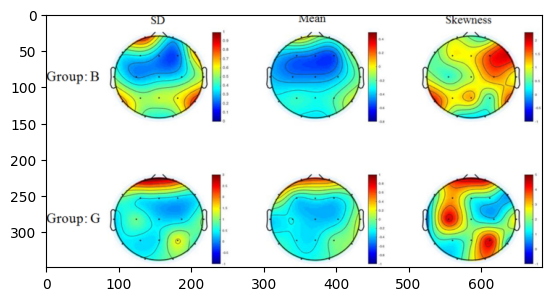

In [29]:
from cv2 import kmeans, TERM_CRITERIA_MAX_ITER, TERM_CRITERIA_EPS, KMEANS_RANDOM_CENTERS, imread, cvtColor, COLOR_BGR2RGB
from numpy import float32, uint8, unique
from matplotlib.image import imread
#from matplotlib.pyplot import show, imshow
from matplotlib import pyplot as plt
image = imread('/11571_2023_10032_Fig13_HTML.png')
#image.shape
#imshow(image.astype(uint8))
#show()
#plt.imshow(image.astype(uint8))
plt.imshow(image)
plt.show()

# k-means clustering of image

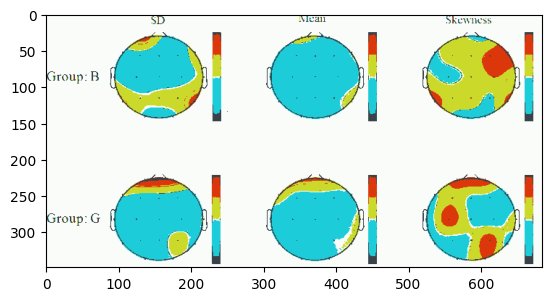

In [32]:
img_data = image.reshape(-1, 3)

# Specify the algorithm's termination criteria
criteria = (TERM_CRITERIA_MAX_ITER + TERM_CRITERIA_EPS, 10, 1.0)

# Run the k-means clustering algorithm on the pixel values
compactness, labels, centers = kmeans(data=img_data.astype(float32), K=5, bestLabels=None, criteria=criteria, attempts=10, flags=KMEANS_RANDOM_CENTERS)

# Apply the RGB values of the cluster centers to all pixel labels
segmented_img = centers[labels].reshape(-1, 3)

# Find the number of unique RGB values
#print(len(unique(segmented_img, axis=0)), 'unique RGB values out of', img_data.shape[0], 'pixels')

# Reshape array to the original image shape
img_colours = segmented_img.reshape(image.shape)

# Display the quantized image
#imshow(img_colours.astype(uint8))
#show()
plt.imshow(img_colours)
plt.show()

# Convert all input variables and the output variable to 1-D arrays from dataframes

In [ ]:
X1 = np.reshape(X1.to_numpy(), (-1, 1))
X2 = np.reshape(X2.to_numpy(), (-1, 1))
X3 = np.reshape(X3.to_numpy(), (-1, 1))
X4 = np.reshape(X4.to_numpy(), (-1, 1))
y = np.reshape(y.to_numpy(), (-1, 1))

## Feature-wise Scatter Plots against the output variable

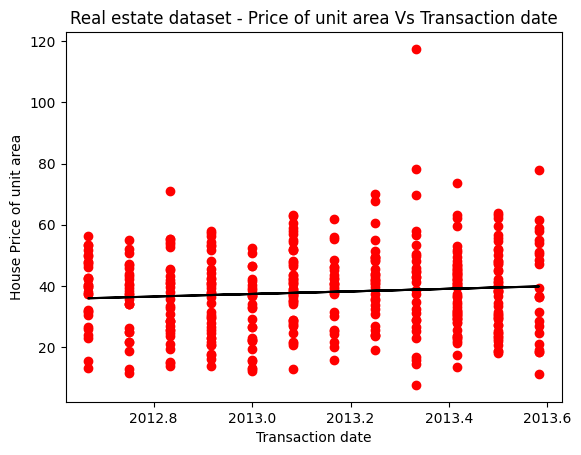

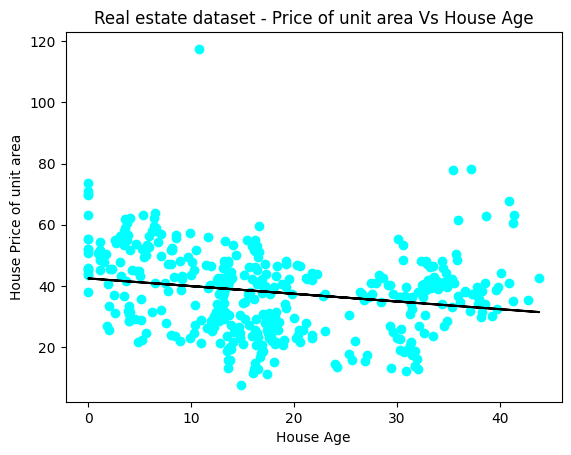

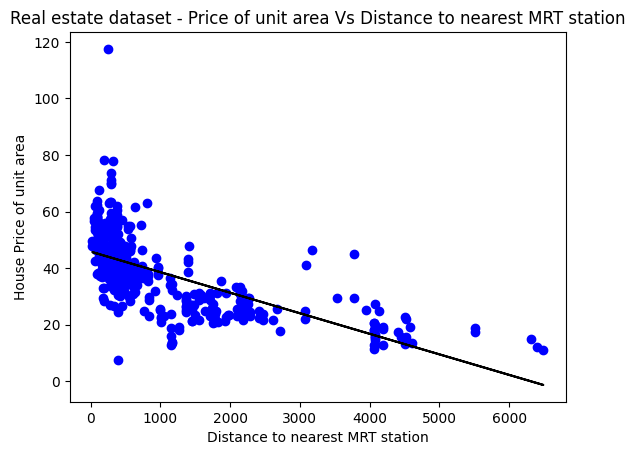

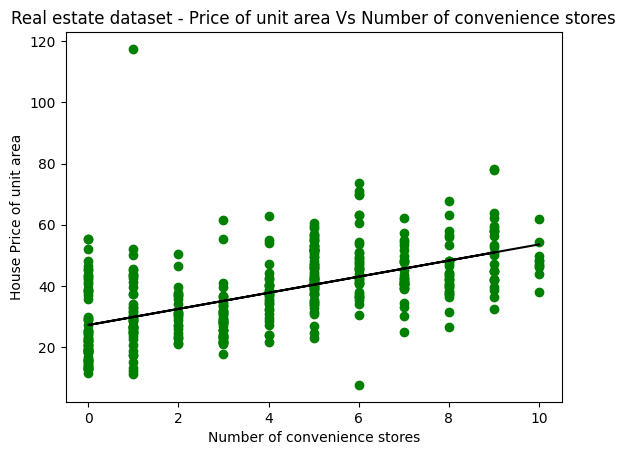

In [ ]:
from sklearn.linear_model import LinearRegression

# X1 - Transaction date
lr_model_X1 = LinearRegression()
lr_model_X1.fit(X1,y)
plt.scatter(X1, y, color = 'red')
plt.plot(X1, lr_model_X1.predict(X1), color = 'black')
plt.title('Real estate dataset - Price of unit area Vs Transaction date')
plt.xlabel('Transaction date')
plt.ylabel('House Price of unit area')
plt.show()

# X2 - House age
lr_model_X2 = LinearRegression()
lr_model_X2.fit(X2,y)
plt.scatter(X2, y, color = 'cyan')
plt.plot(X2, lr_model_X2.predict(X2), color = 'black')
plt.title('Real estate dataset - Price of unit area Vs House Age')
plt.xlabel('House Age')
plt.ylabel('House Price of unit area')
plt.show()

# X3 - Distance to nearest MRT station
lr_model_X3 = LinearRegression()
lr_model_X3.fit(X3,y)
plt.scatter(X3, y, color = 'blue')
plt.plot(X3, lr_model_X3.predict(X3), color = 'black')
plt.title('Real estate dataset - Price of unit area Vs Distance to nearest MRT station')
plt.xlabel('Distance to nearest MRT station')
plt.ylabel('House Price of unit area')
plt.show()

# X4 - Number of convenience stores
lr_model_X4 = LinearRegression()
lr_model_X4.fit(X4,y)
plt.scatter(X4, y, color = 'green')
plt.plot(X4, lr_model_X4.predict(X4), color = 'black')
plt.title('Real estate dataset - Price of unit area Vs Number of convenience stores')
plt.xlabel('Number of convenience stores')
plt.ylabel('House Price of unit area')
plt.show()

# Read all input variables (features) into X array and output variable into y array

# Find total number of samples in the dataset

In [ ]:
import pandas as pd

X1 = pd.read_excel('/content/Real estate valuation data set.xlsx', usecols='B:G')
y1 = pd.read_excel('/content/Real estate valuation data set.xlsx', usecols='H')

print("Total number of samples in the dataset: ", len(X))

Total number of samples in the dataset:  414


# Scale the input variable array and Flatten the output variable array

In [ ]:
y = np.array(y).ravel()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

#Split the input and output variables into Training and Testing sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 1/3, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(276, 6)
(138, 6)
(276,)
(138,)


# Create a Linear Regression Model object


In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

# Fit the Linear Regression model to the X and y training sets (Train the model)

In [ ]:
lr_model.fit(X_train, y_train)

LinearRegression()

# Generate output prediction based on input test set

In [ ]:
y_prediction = lr_model.predict(X_test)

# Evaluate performance of Linear Regression model by computing MAE, MSE, MAPE

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

mae_lr_model = mean_absolute_error(y_test, y_prediction)
mse_lr_model = mean_squared_error(y_test, y_prediction)
mape_lr_model = mean_absolute_percentage_error(y_test, y_prediction)

print('MAE of Linear Regression model', mae_lr_model)
print('MSE of Linear Regression model', mse_lr_model)
print('MAPE of Linear Regression model', mape_lr_model)

MAE of Linear Regression model 6.0686978073397535
MSE of Linear Regression model 71.12724494951935
MAPE of Linear Regression model 0.216832237850308
